In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.manifold import MDS
import scipy.spatial.distance as scidist

In [2]:
def plot_MDS(X_transformed,df,alpha=0.7):
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    g1 = sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue = df['Host'],alpha=alpha,ax=axs[0])
    g1.legend(loc='center', bbox_to_anchor=(1, 1.1), ncol=4)
    g = sns.scatterplot(X_transformed[:,0],X_transformed[:,1],
                        style = df['Host'],
                        markers = ['o', 'X', '>'],
                        hue = df['project_name'],ax=axs[1])
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
    plt.show()

## MDS plot of the dataset
The full cats and dogs data (321 sample) and an equal size sample of human data representing all the projects, are plotted as MDS graph, the Bray-Curtis distance is used.

In [3]:
def calc_MDS(X,alpha=0.7,RS=0):
    res = scidist.pdist(X,metric='braycurtis')
    bc_dist_matrix = scidist.squareform(res)
    #print(bc_dist_matrix)
    bc_dist_matrix = np.nan_to_num(bc_dist_matrix)
    embedding = MDS(n_components=2,n_jobs=8,random_state=RS,dissimilarity='precomputed')
    X_transformed = embedding.fit_transform(bc_dist_matrix)
    print('samples:', X.shape[0],'features:',X.shape[1])
    return(X_transformed)

samples: 642 features: 138


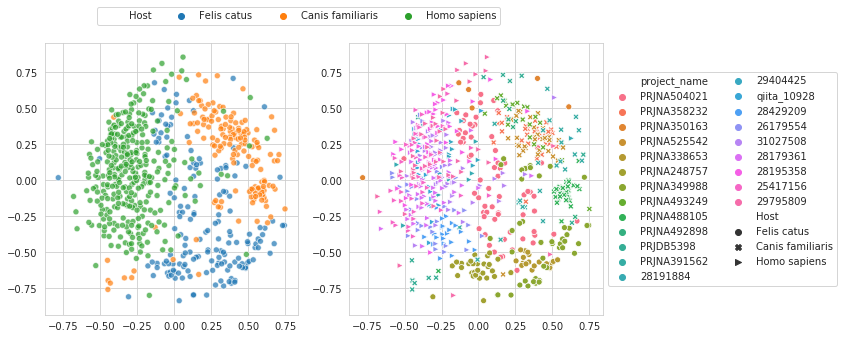

In [4]:
data = joblib.load('joblib/catsNdogs_data.joblib')
cdh_sampled = joblib.load('joblib/catsNdogs_dataset_info.joblib')

X = np.array(data.get_taxa_from_ind(cdh_sampled.index,5,True))
X_transformed = calc_MDS(X)
plot_MDS(X_transformed,cdh_sampled)

## t-SNE

In [5]:
from sklearn.manifold import TSNE

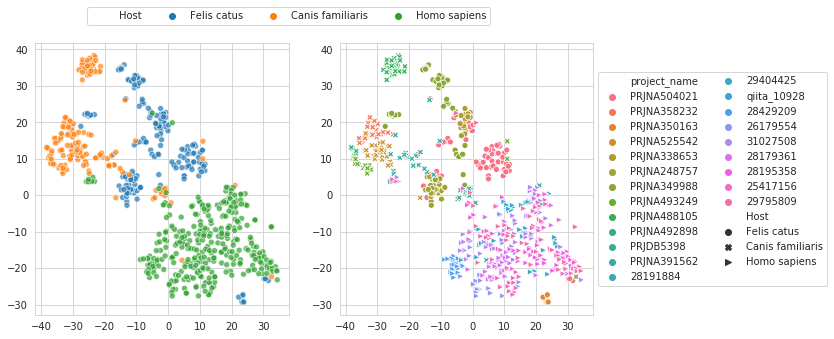

In [6]:
X_transformed = TSNE(random_state=0,metric='braycurtis').fit_transform(X)
plot_MDS(X_transformed,cdh_sampled)

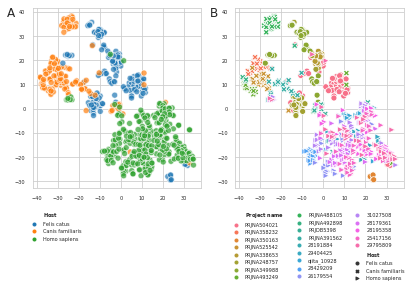

In [7]:
# pic for paper
df = cdh_sampled
alpha = 0.7
plt.rcParams.update({'font.size': 5})
fig, axs = plt.subplots(1,2,figsize=(6.65,3.32))
axs[0].annotate('A',xy=(-0.15,0.95),xycoords='axes fraction',**{'size':12})
axs[1].annotate('B',xy=(-0.15,0.95),xycoords='axes fraction',**{'size':12})
g1 = sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue = df['Host'],alpha=alpha,ax=axs[0])
handles, labels = axs[0].get_legend_handles_labels()
labels[0]= r'$\bf{Host}$'
g1.legend(handles, labels,loc='upper left', bbox_to_anchor=(-0.05,-0.1),ncol=1,markerscale=0.5,frameon=False)
g = sns.scatterplot(X_transformed[:,0],X_transformed[:,1],
                    style = df['Host'],
                    markers = ['o', 'X', '>'],
                    hue = df['project_name'],ax=axs[1])
handles, labels = axs[1].get_legend_handles_labels()
#print(handles)
#print(labels)
labels[0]= r'$\bf{Project \ name}$'
labels[-4]= r'$\bf{Host}$'
g.legend(handles, labels,loc='upper left', bbox_to_anchor=(-0.05,-0.1),ncol=3,markerscale=0.5,frameon=False)
#plt.show()
plt.savefig('pics/Figure1.pdf',dpi = 300,bbox_inches='tight')
#bbox_to_anchor=(-0.2, -0.35),